<a href="https://colab.research.google.com/github/reiskleiton/bootcampAluraDS/blob/main/Kleiton_Reis_Super_Desafio_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Módulo 01 - Bootcamp Data Science Alura
Autor: Kleiton Marques dos Reis

e-mail: reiskleiton@gmail.com


##Contexto da Análise

Na data desta análise (14.11.2020) o Brasil ultrapassa a marca de **164.737** mortes e **5.810.652** casos confirmados por [Covid-19](https://covid.saude.gov.br/). Ocupando a segunda posição no ranking mundial de mortes confirmadass, atrás somente dos Estados Unidos

[fonte](https://news.google.com/covid19/map?hl=pt-BR&gl=BR&ceid=BR%3Apt-419)

Desde a confirmação do [primeiro caso por coronavírus](https://cbn.globoradio.globo.com/media/audio/292682/brasil-confirma-primeiro-caso-de-coronavirus.htm) no dia 26.02.2020, o Brasil enfrenta os mesmos problemas:

* Falha na divulgação dos números de casos e mortes confirmadas nos estados e municípios pelo Ministério da Saúde
> * [Com a soma de dados atrasados, Brasil registra, oficialmente, 926 mortes por Covid-19 em um dia](https://cbn.globoradio.globo.com/media/audio/322403/com-soma-de-dados-atrasados-brasil-registra-oficia.htm)
> * [Minas Gerais não atualiza o número de mortes por Covid-19 desde sábado](https://cbn.globoradio.globo.com/media/audio/322220/minas-gerais-nao-atualiza-o-numero-de-mortes-por-c.htm)

* Flexibilização de medidas de isolamento
> * [Regiões de MG retrocedem na flexibilização de medidas de isolamento](https://cbn.globoradio.globo.com/media/audio/321792/regioes-de-mg-retrocedem-na-flexibilizacao-de-medi.htm)
> * [Mortes por Covid-19 tiveram picos em Minas, Rio e São Paulo após feriados](https://cbn.globoradio.globo.com/media/audio/321239/mortes-por-covid-19-tiveram-picos-em-minas-rio-e-s.htm)
> *[Feriado em SC tem festas com aglomeração, praias e bares lotados em meio à pandemia](https://g1.globo.com/sc/santa-catarina/noticia/2020/10/12/feriado-em-sc-tem-festas-com-aglomeracao-praias-e-bares-lotados-em-meio-a-pandemia.ghtml)


A segunda da doença iniciou no continente Europeu e agora o Brasil começa a apresentar números que se figuram como o início da segunda onda por aqui.

* [Possibilidade de segunda onda da Covid-19 no Nordeste é ‘muito real’, diz especialista](https://jovempan.com.br/programas/jornal-da-manha/possibilidade-de-segunda-onda-da-covid-19-no-nordeste-e-muito-real-diz-especialista.html)
* [Fiocruz afirma que Manaus vive segunda onda da Covid-19 e propõe lockdown para conter avanço do vírus](https://g1.globo.com/am/amazonas/noticia/2020/09/26/fiocruz-afirma-que-manaus-vive-segunda-onda-da-covid-19-e-propoe-lockdown-para-conter-avanco-do-virus.ghtml)
* [Taxa de ocupação de leitos de UTI para Covid-19 no Rio fica acima de 90% na semana](https://cbn.globoradio.globo.com/media/audio/322456/taxa-de-ocupacao-de-leitos-de-uti-para-covid-19-no.htm)

##Objetivo
Considerando o contexto acima nossa, esta análise tem o objetivo de entender o impacto da primeira onda por Covid-19 por regiões e estados brasileiros. As seguintes informações serão analisadas por região e estados brasileiros:

*   Número de casos confirmados
*   Número de mortes confirmadas
*   Número de casos confirmados por 100 mil habitantes
*   Evolução de novos casos confirmados
*   Evolução da taxa de mortalidade

##Resumo
Este projeto tem o objetivo de analisar os dados dos estados brasileiros em relação ao Coronavírus (Em construção)

##Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import zipfile, requests, io
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
#pd.options.display.float_format = "{:,.2f}".format

##Definição de Funções e Dicionários

###Funções

In [ ]:
def codigo_uf_para_regiao(codigo):
    """
    Retorna o nome da regiao de um estado de acordo com seu codigo UF
    """
    #loop
    if 11 <= codigo <= 17:
        return 'Norte'
    elif 21 <= codigo <= 29:
        return 'Nordeste'
    elif 31 <= codigo <= 35:
        return 'Sudeste'
    elif 41 <= codigo <= 43:
        return 'Sul'
    elif 50 <= codigo <= 53:
        return 'Centro-Oeste'
    else:
        return 'Desconhecido'

In [ ]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe

    Source: https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [ ]:
def columns_null_values(data):
  """
  Return a query with all columns that have null values in it.
  
  Parameters
  ----------
  dataframe

  """
  #getting a Series with all null and not null values
  null_values = data.isnull().sum() > 0
  #getting only null values
  null_values = null_values[null_values == True]
  #setting a dataframe from the series
  df_null_values = pd.DataFrame(null_values)
  #reset index
  df_null_values.reset_index(inplace=True, drop=False)
  #rename column
  df_null_values.rename(columns={'index': 'Colunas'}, inplace=True)
  #drop an unnecessary column
  df_null_values.drop(0, axis=1, inplace= True)
  #geting a list of all coluns that have null values
  null_values = df_null_values['Colunas'].tolist()
  #showing dataframe
  return data[null_values]

In [ ]:
def print_bar_plot(axis_x_data, axis_y_data, palette, title, x_label, y_label):
  """
  Returns a bar plot from seaborn library
  
  Parameters
  ---------- 
  axis_x_data, axis_y_data, palette, title, xlabel, ylabel, 
  """
  ax = sns.barplot(x=axis_x_data, y=axis_y_data, palette=palette)
  ax.figure.set_size_inches(16, 8)
  ax.set_title(label=title, fontsize = 16)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax.set_xlabel(x_label, fontsize= 14)
  ax.set_ylabel(y_label, fontsize = 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  ax;

In [ ]:
def print_line_plot(dataframe_data, axis_x_variable, axis_y_variable, hue_variable, title, x_label, y_label):
  """
  Returns a line plot from seaborn library
  
  Parameters
  ---------- 
  axis_x_data, axis_y_data, palette, title, xlabel, ylabel, 
  """
  ax = sns.lineplot(data=dataframe_data, x=axis_x_variable, y=axis_y_variable, hue=hue_variable)
  ax.figure.set_size_inches((16, 8))
  ax.set_title(title, fontsize = 16)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax.set_xlabel(x_label, fontsize= 14)
  ax.set_ylabel(y_label, fontsize = 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
  ax;

In [ ]:
def print_bar_compare_plot(dataframe,title, x_label):
  """
  Returns a bar plot from seaborn library
  
  Parameters
  ---------- 
  dataframe, title, x_label 
  """
  ax = dataframe.plot.bar(rot=0)
  ax.figure.set_size_inches(16, 8)
  ax.set_title(title, fontsize = 16)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax.set_xlabel(x_label, fontsize= 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  ax;

In [ ]:
def tabela_frequencia(data, column_name):
  """
  Returns a dataframe
  
  Parameters
  ---------- 
  dataframe, column_name
  """
  # verificando a distriuíção de frequência para a variável 
  frequencia = data.value_counts()
  # verificando a distriuíção de frequência % para a variável [state]
  percentual = (data.value_counts(normalize=True)*100).round(2)
  # criando dataframe para visualizar os dados
  distribuicao_frequencia = pd.DataFrame({'frequencia' : frequencia, 'percentual' : percentual})
  distribuicao_frequencia.reset_index(drop=False, inplace= True)
  distribuicao_frequencia.rename({'index' : column_name}, axis=1, inplace= True)
  return distribuicao_frequencia

###Dicionários

In [ ]:
uf_code = {
'RO' : '11',
'AC' : '12',
'AM' : '13',
'RR' : '14',
'PA' : '15',
'AP' : '16',
'TO' : '17',
'MA' : '21',
'PI' : '22',
'CE' : '23',
'RN' : '24',
'PB' : '25',
'PE' : '26',
'AL' : '27',
'SE' : '28',
'BA' : '29',
'MG' : '31',
'ES' : '32',
'RJ' : '33',
'SP' : '35',
'PR' : '41',
'SC' : '42',
'RS' : '43',
'MS' : '50',
'MT' : '51',
'GO' : '52',
'DF' : '53'}

In [ ]:
month_abrev={
1 : 'jan',
2 : 'fev',
3 : 'mar',
4 : 'abr',
5 : 'mai',
6 : 'jun',
7 : 'jul',
8 : 'ago',
9 : 'set',
10 : 'out',
11 : 'nov',
12 : 'dez'
}

##Fonte dos dados utilizadas




###**Tabnet** 

*   Fonte: Ministério da Saúde - Sistema de Informações Hospitalares do SUS (SIH/SUS)
*   Link: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def
*   Descrição: Procedimentos hospitalares do SUS - por local de internação - Brasil
*   <font color='red'>Período:</font> Jan 2008 à Ago 2020
*   Arquivos:



> **A061120189_28_143_208.csv** - Valor total por Unidade da Federação e Ano/mês processamento

> **A113803189_28_143_208.csv** - Valor total por Município e Ano/mês processamento

###**COVID-19** 

*   Fonte: Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO.
*   Link: https://brasil.io/dataset/covid19/caso/
*   Descrição: Essa tabela possui os casos confirmados e óbitos obtidos dos boletins das Secretarias Estaduais de Saúde.
*   <font color='red'>Período:</font> Dados capturados em 13 de Novembro de 2020. Importação dos dados feita em 13 de Novembro de 2020 às 20:09:35
*   Arquivos:



>**caso.csv.gz** - Boletins informativos e casos do coronavírus por município por dia

###**Painel Coronavírus RS** 

*   Fonte: Secretaria da Saúde do Estado do Rio Grande do Sul
*   Link: https://ti.saude.rs.gov.br/covid19/
*   Descrição: Painel Coronavírus RS
*   <font color='red'>Período:</font> Dados capturados em 14 de Novembro de 2020
*   Arquivos:



>**SESRS - Coronavírus.csv** - Painel Coronavírus RS

###**CORONAVÍRUS PIAUÍ** 

*   Fonte: CORONAVÍRUS PIAUÍ
*   Link: http://coronavirus.pi.gov.br/
*   <font color='red'>Período:</font> Dados capturados em 14 de Novembro de 2020
*   Arquivos:

>**export-14-11-2020.xlsx** -  CORONAVÍRUS PIAUÍ

##COVID-19 - Brazil.IO

###Análise Exploratória dos Dados

<font color='red'>Observação</font>
***
Na [documentação](https://github.com/turicas/covid19-br/blob/master/api.md#casos) deste dataset há a informação de que na variável **city** o nome do município pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também.

Então na importação deste dataset optei por definir valores Importados/Indefinidos como **valores nulos (nan)**

In [ ]:
# Download do arquivo zip
zip_file_url = 'https://github.com/reiskleiton/bootcampAluraDS/blob/main/datasets/brazil_io/caso.csv.gz?raw=true'
dados_covid = pd.read_csv(zip_file_url, compression='gzip', na_values=['Importados/Indefinidos'])
dados_covid.head(10)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-13,AC,NaN,state,32661,707,242,True,881935.0,894470.0,12.0,3651.43605,0.0216
1,2020-11-12,AC,NaN,state,32515,707,241,False,881935.0,894470.0,12.0,3635.11353,0.0217
2,2020-11-11,AC,NaN,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220
3,2020-11-10,AC,NaN,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221
4,2020-11-09,AC,NaN,state,31788,701,238,False,881935.0,894470.0,12.0,3553.83635,0.0221
5,2020-11-08,AC,NaN,state,31707,699,237,False,881935.0,894470.0,12.0,3544.78071,0.0220
6,2020-11-07,AC,NaN,state,31575,699,236,False,881935.0,894470.0,12.0,3530.02337,0.0221
7,2020-11-06,AC,NaN,state,31326,697,235,False,881935.0,894470.0,12.0,3502.18565,0.0222
8,2020-11-05,AC,NaN,state,31248,697,234,False,881935.0,894470.0,12.0,3493.46540,0.0223
9,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223


In [ ]:
# Verificando a quantidade de registros e variáveis que há no dataset
print(' O dataset da COVID-19 possuí {} registros e {} variáveis.'.format(dados_covid.shape[0], dados_covid.shape[1]))

 O dataset da COVID-19 possuí 960553 registros e 13 variáveis.


In [ ]:
# utilizando a função assess_NA para verificar a quantidade de registros nulos no dataset por variável
assess_NA(dados_covid)

,Number of NA,Percent NA
confirmed_per_100k_inhabitants,17180,1.79
city,10274,1.07
city_ibge_code,3733,0.39
estimated_population,3733,0.39
estimated_population_2019,3733,0.39


####Criando novas variáveis no dataframe

In [ ]:
# convertendo a variável date para o tipo datetime
dados_covid['date'] = pd.to_datetime(dados_covid['date'], yearfirst=True)

In [ ]:
#dados_covid['date'] = pd.to_datetime(dados_covid['date']).dt.date

In [ ]:
# criando a variável de semana do ano de acordo com a data
dados_covid['week_number_of_year'] = dados_covid['date'].dt.isocalendar().week
# criando a variável mês de acordo com a data
dados_covid['month'] = dados_covid['date'].dt.month
# criando a variável month_abrev
dados_covid['month_abrev'] = dados_covid.month.map(month_abrev)

In [ ]:
# criando a variável uf_code
dados_covid['uf_code'] = dados_covid.state.map(uf_code)

In [ ]:
# extraindo a lista de UF
lista_uf_num = dados_covid['uf_code'].astype(int).tolist()
# criando variável regiao
dados_covid['regiao'] = [codigo_uf_para_regiao(i) for i in lista_uf_num]

In [ ]:
dados_covid.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number_of_year,month,month_abrev,uf_code,regiao
0,2020-11-13,AC,NaN,state,32661,707,242,True,881935.0,894470.0,12.0,3651.43605,0.0216,46,11,nov,12,Norte
1,2020-11-12,AC,NaN,state,32515,707,241,False,881935.0,894470.0,12.0,3635.11353,0.0217,46,11,nov,12,Norte
2,2020-11-11,AC,NaN,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220,46,11,nov,12,Norte
3,2020-11-10,AC,NaN,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221,46,11,nov,12,Norte
4,2020-11-09,AC,NaN,state,31788,701,238,False,881935.0,894470.0,12.0,3553.83635,0.0221,46,11,nov,12,Norte


In [ ]:
# verificando a quantidade de registros True para a variável [is_last] por estado [state]
dados_covid.query("is_last == True and place_type == 'state' ").shape[0]

27

In [ ]:
dados_covid.query("place_type == 'state' ").shape[0]

6541

In [ ]:
data_mais_antiga = dados_covid.date.min()
data_mais_recente = dados_covid.date.max()
print('O dataset possuí registros de {} até {}'.format(data_mais_antiga, data_mais_recente))
print('A quantidade de dias no dataset é {}'.format(data_mais_recente-data_mais_antiga))
print('Se cada estado tiver um registro por dia no dataset, o valor de registro deve ser {}'.format((data_mais_recente-data_mais_antiga)*dados_covid.query("is_last == True and place_type == 'state' ").shape[0]))

O dataset possuí registros de 2020-02-25 00:00:00 até 2020-11-13 00:00:00
A quantidade de dias no dataset é 262 days 00:00:00
Se cada estado tiver um registro por dia no dataset, o valor de registro deve ser 7074 days 00:00:00


###Análise por Regiões

In [ ]:
# utilizando a função tabela_frequencia para criar a tabela de quantidade de registros por regioes
distribuicao_frequencia_regioes = tabela_frequencia(dados_covid.regiao, 'regiao')
distribuicao_frequencia_regioes

,regiao,frequencia,percentual
0,Nordeste,330199,34.38
1,Sudeste,280102,29.16
2,Sul,199782,20.80
3,Norte,81655,8.50
4,Centro-Oeste,68815,7.16


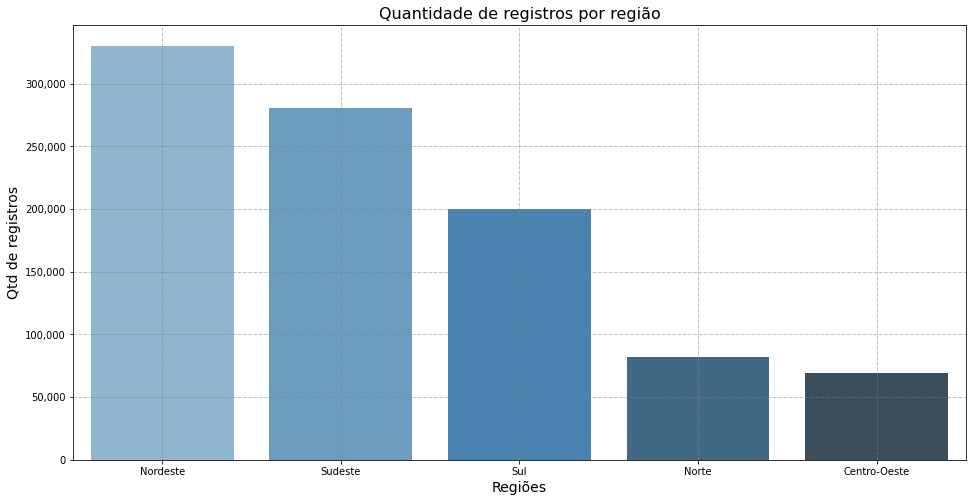

In [ ]:
print_bar_plot(distribuicao_frequencia_regioes.regiao, distribuicao_frequencia_regioes.frequencia, "Blues_d", "Quantidade de registros por região", 'Regiões', 'Qtd de registros')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:

1. A região Nordeste é a que mais possuí registros no dataset, seguida pela região Sudeste.

<font color='grey'>Questionamentos</font>
***

*   Será que estas duas regiões concentram o **maior número** de casos e mortes confirmadas?

**Vamos analisar a seguir**
***
*   Qual a região que possuí o maior número de casos e mortes confirmadas?
*   Qual a região que possuí o maior número de casos confirmados por 100.000 habitantes?
*   Qual a região que possuí a maior taxa de mortalidade (death_rate)?

####Criando um dataframe por região e nova variáveis

In [ ]:
# agrupando o dataset por região, estado e semana epidemiológica
dados_covid_regiao = dados_covid.query("place_type == 'state' ").groupby(by=['regiao','state', 'week_number_of_year']).agg({'order_for_place' : 'max', 'confirmed' : 'max', 'deaths' : 'max', 'estimated_population' : 'max'})
dados_covid_regiao.reset_index(drop=False, inplace=True)
# agrupando o dataset por região e semana epidemiológica
dados_covid_regiao = dados_covid_regiao.groupby(by=['regiao', 'week_number_of_year']).agg({'confirmed' : 'sum', 'deaths' : 'sum', 'estimated_population' : 'sum'})
dados_covid_regiao.reset_index(drop=False, inplace=True)
dados_covid_regiao.head()

,regiao,week_number_of_year,confirmed,deaths,estimated_population
0,Centro-Oeste,10,1,0,3055149.0
1,Centro-Oeste,11,20,0,12978083.0
2,Centro-Oeste,12,161,0,16504303.0
3,Centro-Oeste,13,401,2,16504303.0
4,Centro-Oeste,14,708,12,16504303.0


In [ ]:
# criando variável confirmed_per_100k_inhabitants
dados_covid_regiao['confirmed_per_100k_inhabitants'] = ((dados_covid_regiao.confirmed / dados_covid_regiao.estimated_population) * 100000).round(2)
# criando variável death_rate
dados_covid_regiao['death_rate'] = ((dados_covid_regiao.deaths / dados_covid_regiao.confirmed) * 100).round(2)
dados_covid_regiao.head()

,regiao,week_number_of_year,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate
0,Centro-Oeste,10,1,0,3055149.0,0.03,0.00
1,Centro-Oeste,11,20,0,12978083.0,0.15,0.00
2,Centro-Oeste,12,161,0,16504303.0,0.98,0.00
3,Centro-Oeste,13,401,2,16504303.0,2.43,0.50
4,Centro-Oeste,14,708,12,16504303.0,4.29,1.69


In [ ]:
# ordenando dataset pela variável data
dados_covid_regiao.sort_values(by=['regiao', 'week_number_of_year', 'confirmed'], ascending=True, inplace=True)
# criando uma lista com todos os estados no datset
lista_regioes = dados_covid_regiao.regiao.unique()
# criando a lista de lista de todos os novos casos utilizando a função diff para cada regiao
novos_casos = [dados_covid_regiao.query('regiao == @regiao')['confirmed'].diff() for regiao in lista_regioes]
# criando a nova variável [new_cases] no dataframe
dados_covid_regiao['new_cases'] = [item for lista_regioes in novos_casos for item in lista_regioes]
dados_covid_regiao.head()

,regiao,week_number_of_year,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,new_cases
0,Centro-Oeste,10,1,0,3055149.0,0.03,0.00,NaN
1,Centro-Oeste,11,20,0,12978083.0,0.15,0.00,19.0
2,Centro-Oeste,12,161,0,16504303.0,0.98,0.00,141.0
3,Centro-Oeste,13,401,2,16504303.0,2.43,0.50,240.0
4,Centro-Oeste,14,708,12,16504303.0,4.29,1.69,307.0


In [ ]:
# verificando a quantidade de NaN values na nova coluna
# como temos 5 regioes, devemos ter 5 NaN values
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_regiao.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 5


In [ ]:
# substituíndo valores nulos da variável new_cases por 0.0
dados_covid_regiao.new_cases.fillna(value=0.0, inplace=True)
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_regiao.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 0


####Gerando visualizações

#####Número de casos confirmados

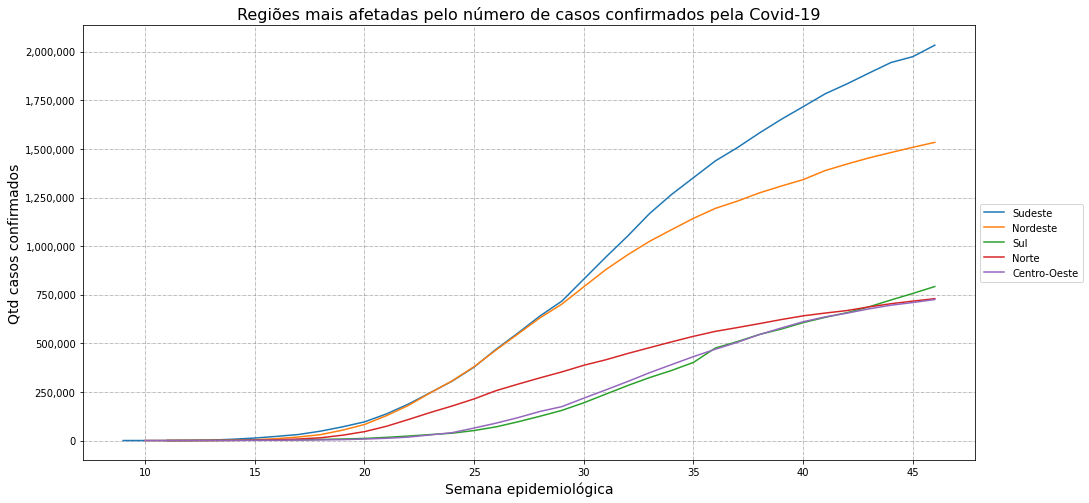

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['confirmed'], ascending=False), 'week_number_of_year', 'confirmed', 'regiao', 'Regiões mais afetadas pelo número de casos confirmados pela Covid-19', 'Semana epidemiológica', 'Qtd casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:
1. O ordem no número de casos confirmados é exatamente a mesma que quantidade de registros por regiões.
2. Até a semana 30 as regiões Sudeste e Nordeste possuíam números exatamente iguais, assim como as regiões Sul e Centro-Oeste. Logo após, a região Sudeste tem uma crescimento exponecial no número de casos confirmados

<font color='grey'>Questionamentos</font>
***

* Será que o número de mortes também segue esta ordem (Sudeste, Nordeste, Sul, Norte e Centro-Oeste?
* Será que a partir da semana 30, foi quando os estados da região Sudeste iniciaram a flexibilização das regras de distânciamento social e isso ocasionou no aumento do número de casos confirmados?

**Vamos analisar a seguir**
***
*   O número de mortes por cada região

#####Número de mortes confirmadas

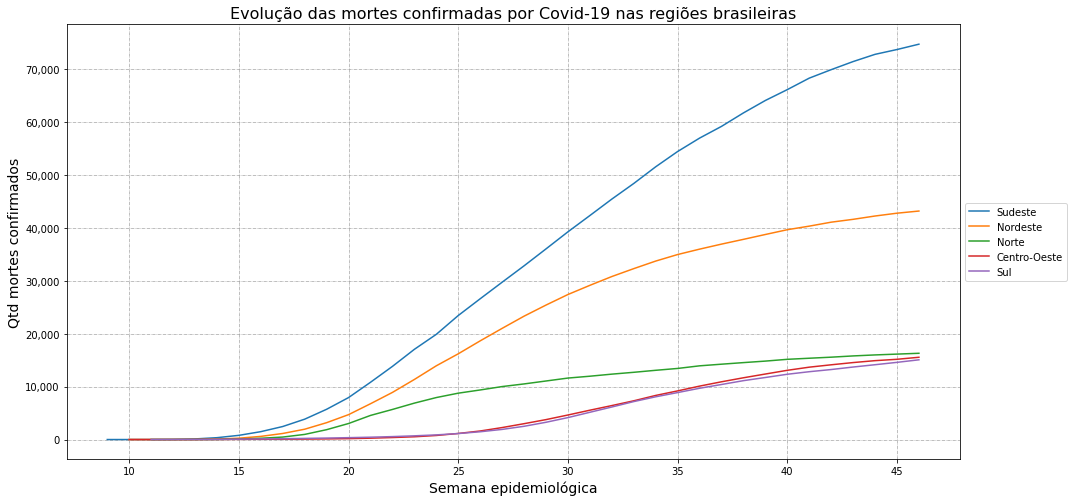

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['deaths'], ascending=False), 'week_number_of_year', 'deaths', 'regiao', 'Evolução das mortes confirmadas por Covid-19 nas regiões brasileiras', 'Semana epidemiológica', 'Qtd mortes confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:

1. A ordem no número de mortes confirmados não é a mesma que o número de casos confirmados, ou seja, o número de casos confirmados não está relacionado ao número de mortes proporcionalmente.
2. Apesar de no número de casos confirmados para as regiões Sudeste e Nordeste serem iguais, o número de mortes para a região Nordeste sempre manteve-se abaixo do número de mortes registradas para a região Sudeste.
3. As regiões Centro-Oeste e Sul possuem um comportamento no número de mortes exatamente igual.

**Vamos analisar a seguir**
***
*   O número de casos confirmados por 100 mil habitantes

#####Número de casos confirmados por 100 mil habitantes

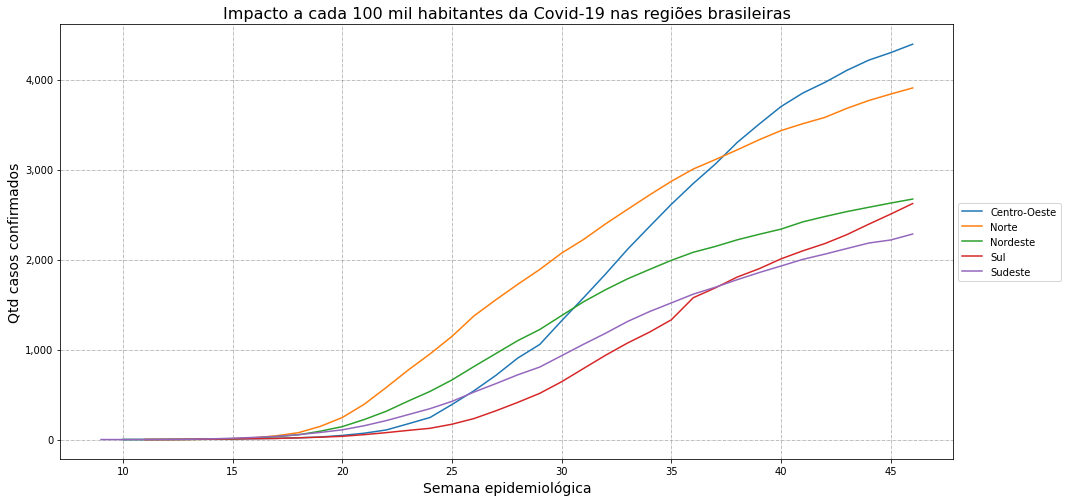

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'week_number_of_year', 'confirmed_per_100k_inhabitants', 'regiao', 'Impacto a cada 100 mil habitantes da Covid-19 nas regiões brasileiras', 'Semana epidemiológica', 'Qtd casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:
1. Que o impacto a cada 100 mil habitante nas regiões Centro-Oeste e Norte é praticamente o dobro que a região Sudeste, região que possuí o maior número casos e mortes confirmadas.

**Vamos analisar a seguir**
***
*   O número de novos casos confirmados pela Covid-19

#####Evolução de novos casos confirmados

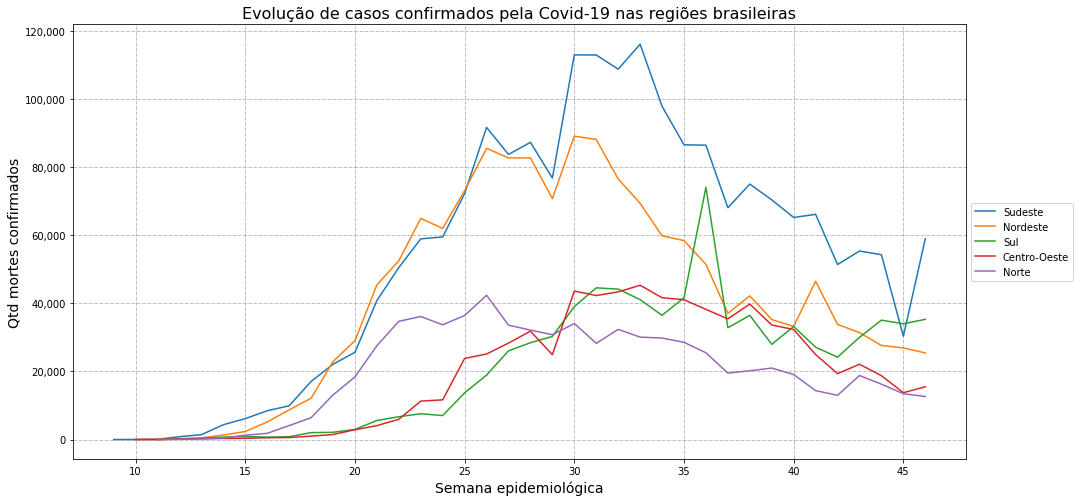

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['new_cases'], ascending=False), 'week_number_of_year', 'new_cases', 'regiao', 'Evolução de casos confirmados pela Covid-19 nas regiões brasileiras', 'Semana epidemiológica', 'Qtd mortes confirmados')

#####Evolução da taxa de mortalidade

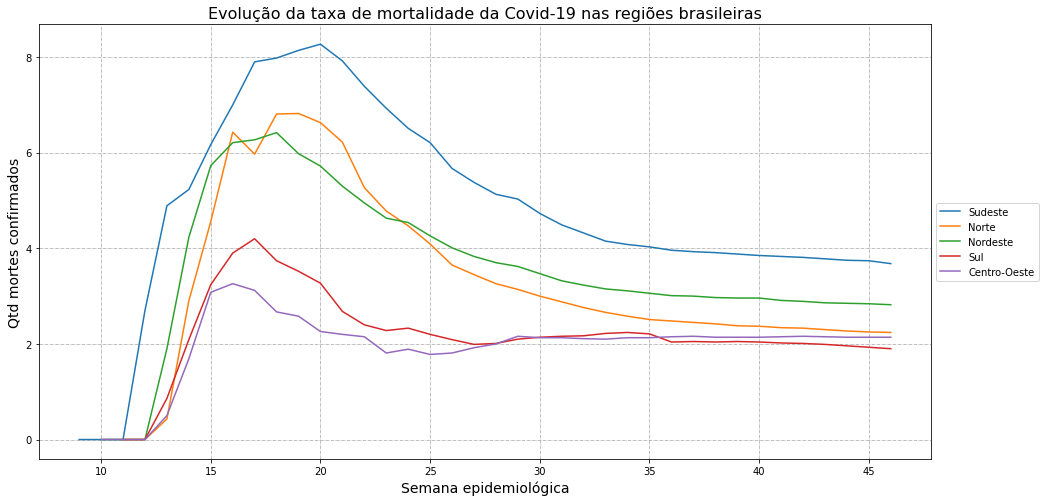

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['death_rate'], ascending=False), 'week_number_of_year', 'death_rate', 'regiao', 'Evolução da taxa de mortalidade da Covid-19 nas regiões brasileiras', 'Semana epidemiológica', 'Qtd mortes confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar, que todas as regiões tiveram um grande pico na taxa de mortalidade pela Covid-19 entre a semana 15 (06.04.2020) e 20 (11.05.2020). As regiões Sudeste, Norte e Nordeste foram as mais afetadas pela taxa de mortalidade.

<font color='salmon'>Resposta</font>
***
*   Qual a região que possuí o maior número de casos e mortes confirmadas? **As regiões Sudeste e Nordeste são as duas regiões com os maiores números de casos e mortes confirmadas**
*   Qual a região que possuí o maior número de casos confirmados por 100.000 habitantes? **A região Centro-Oeste tem maior número de casos confirmados por 100.000 habitantes**
*   Qual a região que possuí a maior taxa de mortalidade (death_rate)? **A região Sudeste é a que possuí a maior taxa de mortalidade da Covid-19 no Brasil**


###Análise por Estados

In [ ]:
# criando cópia do dataset
dados_covid_estados = dados_covid.copy()
# realizando query para selecionar somente os estados
dados_covid_estados = dados_covid_estados.query("place_type == 'state' ")
# deletando a variável city
dados_covid_estados.drop('city', axis= 1, inplace= True)
dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number_of_year,month,month_abrev,uf_code,regiao
0,2020-11-13,AC,state,32661,707,242,True,881935.0,894470.0,12.0,3651.43605,0.0216,46,11,nov,12,Norte
1,2020-11-12,AC,state,32515,707,241,False,881935.0,894470.0,12.0,3635.11353,0.0217,46,11,nov,12,Norte
2,2020-11-11,AC,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220,46,11,nov,12,Norte
3,2020-11-10,AC,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221,46,11,nov,12,Norte
4,2020-11-09,AC,state,31788,701,238,False,881935.0,894470.0,12.0,3553.83635,0.0221,46,11,nov,12,Norte


####Criando novas variáveis no dataframe

In [ ]:
# ordenando dataset pela variável data
dados_covid_estados.sort_values(by=['date'], ascending=True, inplace=True)
# criando uma lista com todos os estados no datset
lista_estados = dados_covid_estados.state.unique()
# criando a lista de lista de todos os novos casos utilizando a função diff para cada estado
novos_casos = [dados_covid_estados.query('state == @estado')['confirmed'].diff() for estado in lista_estados]
# criando a nova variável [new_cases] no dataframe
dados_covid_estados['new_cases'] = [item for lista_estados in novos_casos for item in lista_estados]
dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number_of_year,month,month_abrev,uf_code,regiao,new_cases
843970,2020-02-25,SP,state,1,0,1,False,45919049.0,46289333.0,35.0,0.00216,0.0,9,2,fev,35,Sudeste,NaN
843969,2020-02-26,SP,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0,9,2,fev,35,Sudeste,0.0
843968,2020-02-27,SP,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0,9,2,fev,35,Sudeste,0.0
843967,2020-02-28,SP,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0,9,2,fev,35,Sudeste,1.0
843966,2020-02-29,SP,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0,9,2,fev,35,Sudeste,0.0


In [ ]:
# verificando a quantidade de NaN values na nova coluna
# como temos 27 estados, devemos ter 27 NaN values
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_estados.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 27


In [ ]:
# substituíndo valores nulos da variável new_cases por 0.0
dados_covid_estados.new_cases.fillna(value=0.0, inplace=True)
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_estados.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 0


In [ ]:
# utilizando a função tabela_frquencia para criar a tabela de frequencia por estados
distribuicao_frequencia_estados = tabela_frequencia(dados_covid_estados.state, 'uf')
distribuicao_frequencia_estados

,uf,frequencia,percentual
0,SP,257,3.93
1,ES,253,3.87
2,BA,251,3.84
3,DF,251,3.84
4,MG,249,3.81
5,AL,248,3.79
6,PE,247,3.78
7,PB,247,3.78
8,GO,247,3.78
9,SC,246,3.76


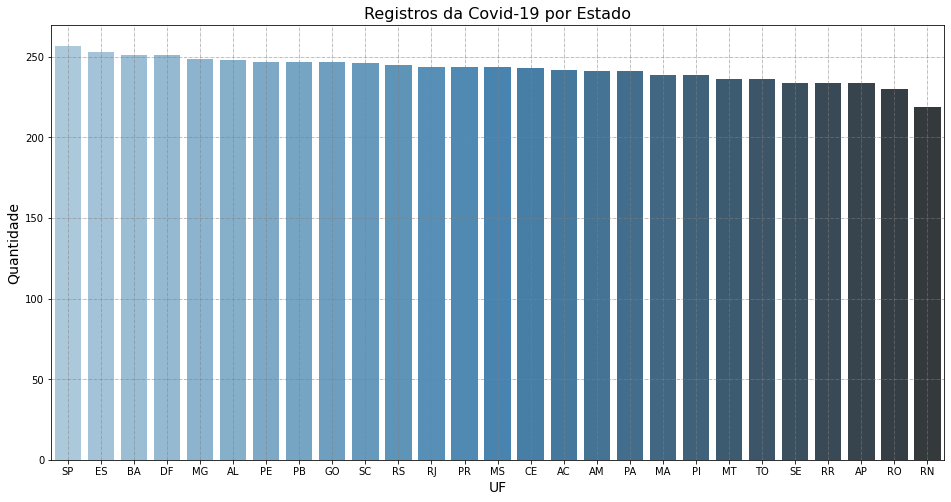

In [ ]:
print_bar_plot(distribuicao_frequencia_estados.uf, distribuicao_frequencia_estados.frequencia, "Blues_d", 'Registros da Covid-19 por Estado', 'UF', 'Quantidade')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que a quantidade de registros entre os estados é semelhante

<font color='grey'>Questionamentos</font>
***

*   Será que os estados com a maior quantidade de registros também o estado com maior número de casos e mortes confirmadas?
*   Qual o estado de cada região que possuí o maior número de casos e mortes registradas?

**Vamos analisar a seguir**
***
*   Quais os estados que possuem o maior número de casos e mortes confirmadas?
*   Quais os estados que possuem o maior número de casos confirmados por 100.000 habitantes?
*   Quais os estados que possuem a maior taxa de mortalidade (death_rate)?



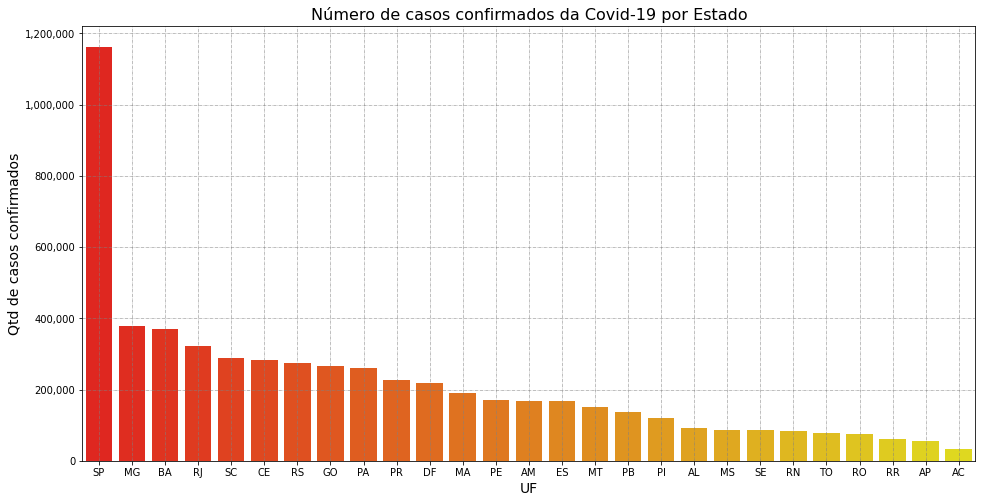

In [ ]:
print_bar_plot(dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state, dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed, 'autumn', 'Número de casos confirmados da Covid-19 por Estado', 'UF', 'Qtd de casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:

1. O estado de **SP é o estado com maior número de casos confirmados do país**. Seguido por MG, BA, RJ e SC, estes são os **5 estados com maior** número de casos confirmados do Brasil.
2. Quando comparamos o estado de SP a MG, o estado de SP possuí quase três vezes mais o número de casos que o MG. Enquanto o MG e BA, possuem número de casos confirmados semelhantes

<font color='grey'>Questionamentos</font>
***

*  O estado de SP é o estado com maior número de mortes por que segundo o IGBE é também o maior em população? Ou por que a população não adotou medidas de distânciamente social?

**Vamos analisar a seguir**
***
*   Se o número de mortes está associada ao número de casos confirmados



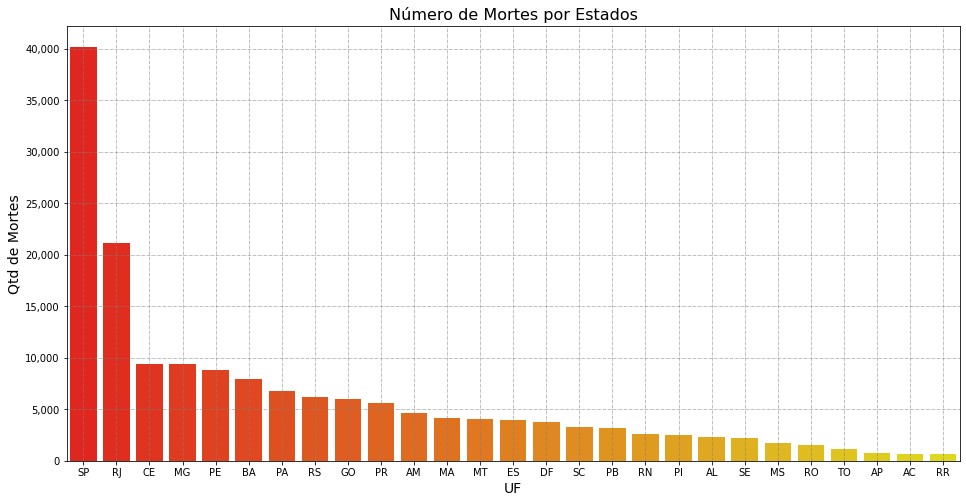

In [ ]:
print_bar_plot(dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).state,dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).deaths, 'autumn', 'Número de Mortes por Estados', 'UF', 'Qtd de Mortes')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Aqui temos algumas pontos importantes que devemos comentar:

1. O estado de SP **confirmar-se** com o estado com o maior número de casos e mortes do Brasil.
2. O segundo estado com maior número de mortes não é MG, mas RJ que na visualização anterior é o 4° estado com o maior número de casos registrados.
3. Aqui há um comportamento estranho, os estados de SC e PE que ocupam 5° e 13° posições respectivamente no número de casos confirmados, possuem um comportamento diferente no número de mortes. O estado de PE é o 5° estado com maior número de mortes, enquanto SC ocupa a 16° posição.

<font color='grey'>Questinamentos</font>
***

*   Por que o estado de SP é o estado com maior número de casos e mortes confirmadas? Será que esses números estão relacionados ao tamanho da população por estados?
*   O que aconteceu nos casos onde a posição dos estados inverteu, por exemplo, MG e RJ?
*   Os estados não estão reportando os números de forma correta, a população não está procurando assistência médica ou os estados adotaram medidas mais restritivas?
*   O que aconteceu com os estados de PE e SC para terem o comportamento acima?

**Vamos analisar a seguir**
***

*   O número de casos e mortes confirmadas dos 5 estados ordenados pelo número de casos confirmados
*   Os números dos estados de PE e SC



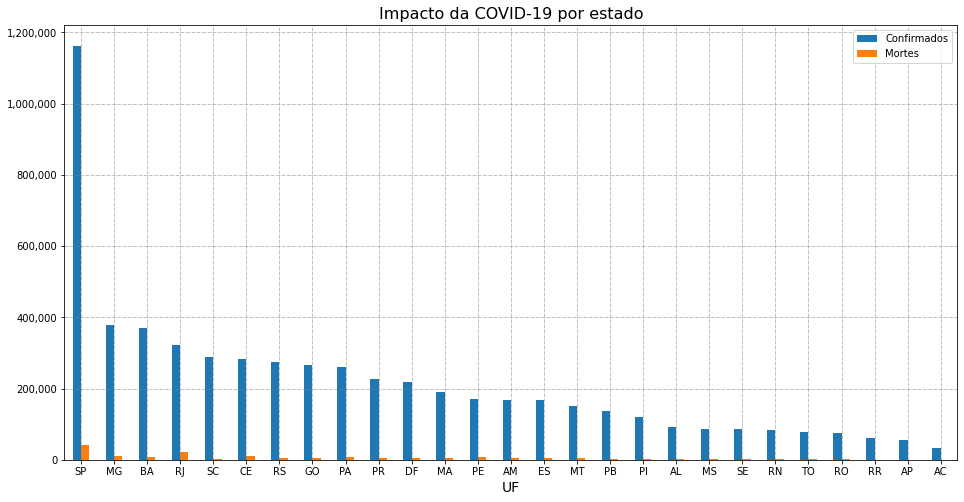

In [ ]:
casos_confirmados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed).tolist()
numero_de_mortes = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).deaths).tolist()
estados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state).tolist()
df = pd.DataFrame({'Confirmados': casos_confirmados,'Mortes': numero_de_mortes}, index=estados)

# calling function
print_bar_compare_plot(df, 'Impacto da COVID-19 por estado', 'UF')

In [ ]:
estados_maior_numero_confirmados = dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state.head(5).tolist()
estados_menor_numero_confirmados = dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state.tail(5).tolist()

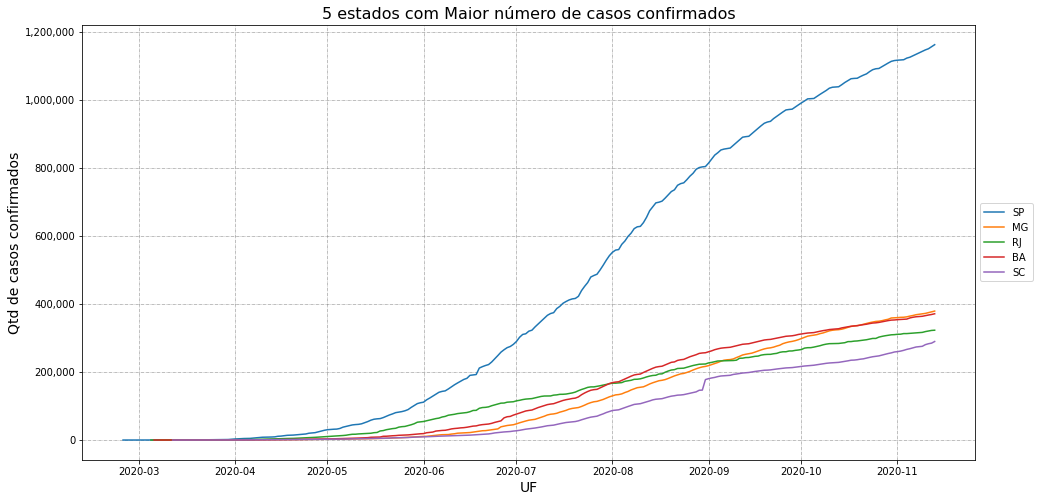

In [ ]:
print_line_plot(dados_covid_estados.query('state == @estados_maior_numero_confirmados').sort_values(by=['confirmed'], ascending=True), 'date', 'confirmed', 'state', '5 estados com Maior número de casos confirmados', 'UF', 'Qtd de casos confirmados')

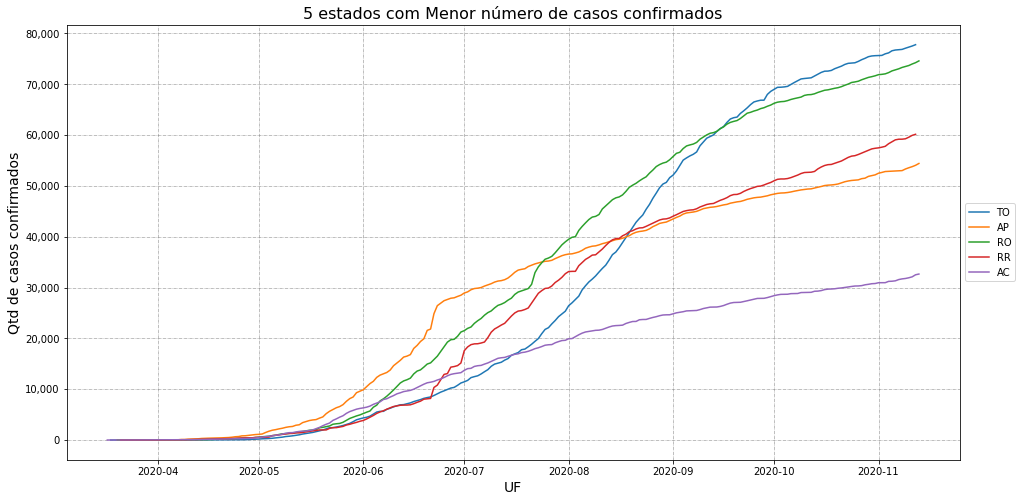

In [ ]:
print_line_plot(dados_covid_estados.query('state == @estados_menor_numero_confirmados').sort_values(by=['confirmed'], ascending=True), 'date', 'confirmed', 'state', '5 estados com Menor número de casos confirmados', 'UF', 'Qtd de casos confirmados')

In [ ]:
estados_maior_numero_confirmados = dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).state.head(5).tolist()
estados_menor_numero_confirmados = dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).state.tail(5).tolist()

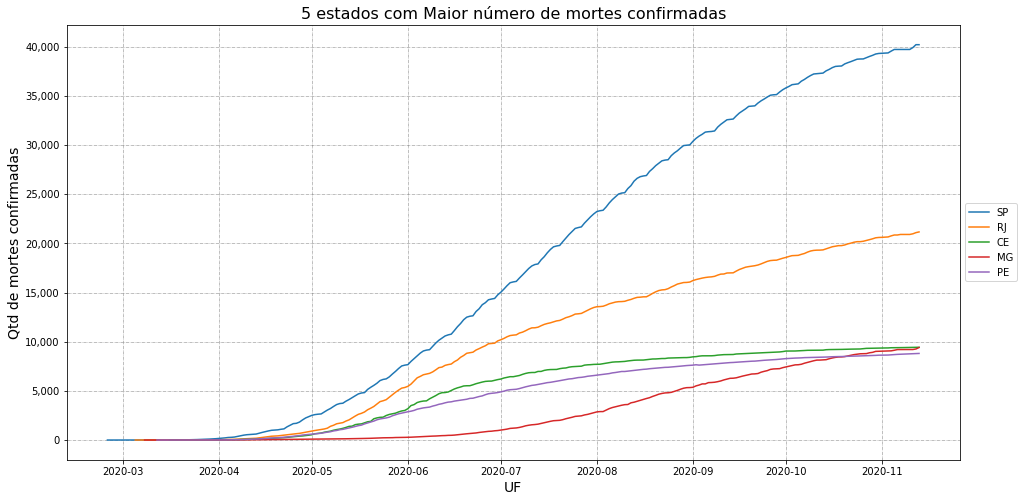

In [ ]:
print_line_plot(dados_covid_estados.query('state == @estados_maior_numero_confirmados').sort_values(by=['deaths'], ascending=False), 'date', 'deaths', 'state', '5 estados com Maior número de mortes confirmadas', 'UF', 'Qtd de mortes confirmadas')

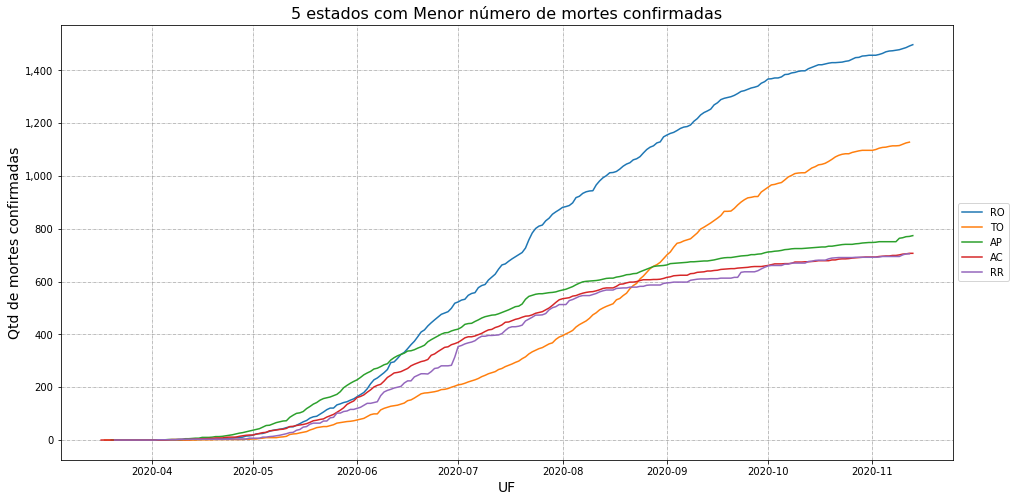

In [ ]:
print_line_plot(dados_covid_estados.query('state == @estados_menor_numero_confirmados').sort_values(by=['deaths'], ascending=False), 'date', 'deaths', 'state', '5 estados com Menor número de mortes confirmadas', 'UF', 'Qtd de mortes confirmadas')

###Análise por Municípios

(Teresina (PI) – 2211001), (Rio Pardo (RS) – 4315701), e (Santa Cruz do Sul (RS) – 4316808)

In [ ]:
# selecionando os municipios no dataframe
dados_covid_municipios = dados_covid.query("city == 'Teresina' or city == 'Rio Pardo' or city == 'Santa Cruz do Sul' ")
dados_covid_municipios.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number_of_year,month,month_abrev,uf_code,regiao
345747,2020-11-13,PI,Teresina,city,40319,1136,238,True,864845.0,868075.0,2211001.0,4644.64476,0.0282,46,11,nov,22,Nordeste
345748,2020-11-12,PI,Teresina,city,40110,1132,237,False,864845.0,868075.0,2211001.0,4620.56850,0.0282,46,11,nov,22,Nordeste
345749,2020-11-11,PI,Teresina,city,39940,1129,236,False,864845.0,868075.0,2211001.0,4600.98494,0.0283,46,11,nov,22,Nordeste
345750,2020-11-10,PI,Teresina,city,39732,1126,235,False,864845.0,868075.0,2211001.0,4577.02387,0.0283,46,11,nov,22,Nordeste
345751,2020-11-09,PI,Teresina,city,39504,1125,234,False,864845.0,868075.0,2211001.0,4550.75886,0.0285,46,11,nov,22,Nordeste


In [ ]:
# verificando se há somente dois valores para a variável state [PI e RS] e três valores para as variáveis city e city_ibge_code
valor_state = dados_covid_municipios.state.drop_duplicates().tolist()
valor_city = dados_covid_municipios.city.drop_duplicates().tolist()
valor_city_ibge_code = dados_covid_municipios.city_ibge_code.drop_duplicates().tolist()

#imprimindo os valores
print('Os estados selecionados foram {}'.format(valor_state))
print('Os municípios selecionados forma {}'.format(valor_city))
print('Os códigos IBGE destes municípios são {}'.format(valor_city_ibge_code))

Os estados selecionados foram ['PI', 'RS']
Os municípios selecionados forma ['Teresina', 'Rio Pardo', 'Santa Cruz do Sul']
Os códigos IBGE destes municípios são [2211001.0, 4315701.0, 4316808.0]


####Análise Exploratória dos Dados

In [ ]:
# Verificando a quantidade de registros e variáveis que há no dataset
print(' O dataset da COVID-19 possuí {} registros e {} variáveis.'.format(dados_covid_municipios.shape[0], dados_covid_municipios.shape[1]))

 O dataset da COVID-19 possuí 666 registros e 18 variáveis.


In [ ]:
# utilizando a função assess_NA para verificar a quantidade de registros nulos no dataset por variável
assess_NA(dados_covid_municipios)

,Number of NA,Percent NA


####Verificar números do dataset com as informações disponíbilizadas pelas Secretárias dos estados

#####Base do RS

In [ ]:
url = 'https://raw.githubusercontent.com/reiskleiton/bootcampAluraDS/main/datasets/ses_rs/SESRS%20-%20Coronav%C3%ADrus.csv'

In [ ]:
dados_rs = pd.read_csv(url, sep=',')
dados_rs.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dados_rs.head()

,Município,Confirmados,Novos Confirmados,Incidência /100 mil hab,Óbitos,Novos Óbitos,Mortalidade /100 mil hab
0,Porto Alegre,45446,377,3062.9,1397,21,94.2
1,Caxias do Sul,12561,333,2458.6,186,0,36.4
2,Canoas,10135,91,2924.0,344,3,99.2
3,Passo Fundo,8731,73,4295.2,178,0,87.6
4,São Leopoldo,7992,19,3374.5,166,0,70.1


In [ ]:
dados_rs.query("Município == 'Rio Pardo' or Município == 'Santa Cruz do Sul'")

,Município,Confirmados,Novos Confirmados,Incidência /100 mil hab,Óbitos,Novos Óbitos,Mortalidade /100 mil hab
30,Santa Cruz do Sul,1846,27,1415.5,15,1,11.5
97,Rio Pardo,487,2,1272.4,14,0,36.6


In [ ]:
dados_covid_municipios.query("is_last == True and state == 'RS'")

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number_of_year,month,month_abrev,uf_code,regiao
816878,2020-11-13,RS,Rio Pardo,city,485,14,210,True,38275.0,38265.0,4315701.0,1267.47681,0.0289,46,11,nov,43,Sul
820567,2020-11-13,RS,Santa Cruz do Sul,city,1819,14,218,True,130416.0,131365.0,4316808.0,1384.69151,0.0077,46,11,nov,43,Sul


##Tabnet - Procedimentos hospitalares do SUS - por local de internação - Brasil

####Valor total por Unidade da Federação e Ano/mês processamento

In [ ]:
url = 'https://raw.githubusercontent.com/reiskleiton/bootcampAluraDS/main/datasets/tabnet/A061120189_28_143_208.csv'

In [ ]:
dados_tabnet = pd.read_csv(url,sep=';', skiprows=3, skipfooter=12, thousands='.', decimal=',', encoding='ISO-8859-1', na_values='-', engine='python')

In [ ]:
dados_tabnet.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,NaN,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,302071

In [ ]:
dados_tabnet.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,1.013743e+08,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,1.924162e+07,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,1.779065e+07,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417

#####Selecionando período de 2020 do dataset

In [ ]:
dados_tabnet = dados_tabnet.set_index('Unidade da Federação')
dados_tabnet.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,NaN,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,4.206680e+08
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2755620.24,

In [ ]:
# selecionando somente os meses de 2020
colunas_interessadas = dados_tabnet.columns[-9:-1]
# removendo as colunas até 2008/Fev
dados_tabnet_2020 = dados_tabnet[colunas_interessadas]
dados_tabnet_2020.reset_index(drop=False, inplace=True)
dados_tabnet_2020.head()

,Unidade da Federação,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
0,11 Rondônia,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78
1,12 Acre,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN
2,13 Amazonas,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67
3,14 Roraima,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18
4,15 Pará,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02


#####Alterando variáveis no dataframe

In [ ]:
# substituindo o caracter / das colunas por _
dados_tabnet_2020.columns = dados_tabnet_2020.columns.str.replace(pat='/', repl='_')

In [ ]:
# criando a variável [UF_COD] que contem o número da federação de cada estado
dados_tabnet_2020['uf_code'] = [valor[:2] for valor in dados_tabnet_2020['Unidade da Federação']]
# removendo o códifo uf do nome do estado
dados_tabnet_2020['Unidade da Federação'] = [valor[3:] for valor in dados_tabnet_2020['Unidade da Federação']]
dados_tabnet_2020.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unidade da Federação,2020_Jan,2020_Fev,2020_Mar,2020_Abr,2020_Mai,2020_Jun,2020_Jul,2020_Ago,uf_code
0,Rondônia,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,11
1,Acre,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,12
2,Amazonas,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,13
3,Roraima,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,14
4,Pará,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,15


In [ ]:
#extraindo a lista de UF
lista_uf_num = dados_tabnet_2020['uf_code'].astype(int).tolist()

In [ ]:
dados_tabnet_2020['regiao'] = [codigo_uf_para_regiao(i) for i in lista_uf_num]
dados_tabnet_2020.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unidade da Federação,2020_Jan,2020_Fev,2020_Mar,2020_Abr,2020_Mai,2020_Jun,2020_Jul,2020_Ago,uf_code,regiao
0,Rondônia,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,11,Norte
1,Acre,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,12,Norte
2,Amazonas,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,13,Norte
3,Roraima,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,14,Norte
4,Pará,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,15,Norte


In [ ]:
# reordenando variáveis do dataframe
list(dados_tabnet_2020.columns)

['Unidade da Federação',
 '2020_Jan',
 '2020_Fev',
 '2020_Mar',
 '2020_Abr',
 '2020_Mai',
 '2020_Jun',
 '2020_Jul',
 '2020_Ago',
 'uf_code',
 'regiao']

In [ ]:
dados_tabnet_2020 = dados_tabnet_2020[['uf_code',
 'regiao',
 'Unidade da Federação',
 '2020_Jan',
 '2020_Fev',
 '2020_Mar',
 '2020_Abr',
 '2020_Mai',
 '2020_Jun',
 '2020_Jul',
 '2020_Ago']]

In [ ]:
dados_tabnet_2020.rename(columns={'Unidade da Federação' : 'state'}, inplace=True)

#####Indentificando e tratando valores nulos (nan) no dataframe

In [ ]:
assess_NA(dados_tabnet_2020)

,Number of NA,Percent NA
2020_Ago,1,3.7


In [ ]:
columns_null_values(dados_tabnet_2020)

,2020_Ago
0,1.028546e+07
1,NaN
2,1.472644e+07
3,2.826486e+06
4,3.991119e+07
5,2.942274e+06
6,8.240261e+06
7,2.858754e+07
8,2.321062e+07
9,5.980861e+07


**NOTA:** 
Os valores foram ajustado de acordo com a documentação do Tabnet, que sugere que os valores sejam substituídos por 0.0

In [ ]:
# substituindo valores nulos encontrados por (0.0)
dados_tabnet_2020.fillna(0.0, inplace= True)